In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(context="poster", font_scale=1.4)
import glob
import time
import itertools
from astropy import constants as const
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

km = 1e5 # cm in km
yr = 3600*24*365.24 # s in yr
au = 1.496e13
M_earth = const.M_earth.cgs.value

/Users/egentry/anaconda/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
checkpoint_filenames = glob.glob("checkpoint*.dat")
checkpoint_filenames = sorted(checkpoint_filenames)

cols = ["Sigma"]

df= pd.DataFrame()
times = np.empty(len(checkpoint_filenames))
masses = np.empty_like(times)
for k, filename in enumerate(checkpoint_filenames):
    f = open(filename)
    times[k] = float(f.readline().split()[3])
    f.close()
    data = np.loadtxt(filename)
    masses[k] = np.sum(data[1:-1,0] * data[1:-1,1])
    index = pd.MultiIndex.from_product([k, data[1:-1,0]/au],
                                       names=["k", "R"])

    df_tmp = pd.DataFrame(data[1:-1,1:], columns=cols, index=index)
    df = pd.concat([df, df_tmp])

#rescale to more appropriate units (cm -> km)
# df.r /= km
# df.u /= km
# no need to rescale:
# df.rho *= 1
# df.P *= 1
    
    
def plotter(k):
    (df.loc[k]["Sigma"]).plot(label="data")
    plt.xlabel("R [AU]")
    plt.ylabel(r"$\Sigma$ [g cm$^{-2}$]")
#     plt.xscale("log")
#     plt.yscale("log")
    plt.axvline(x=1, linestyle="dashed", color="k", label="impulse")
    plt.legend(loc="best")
    plt.show()



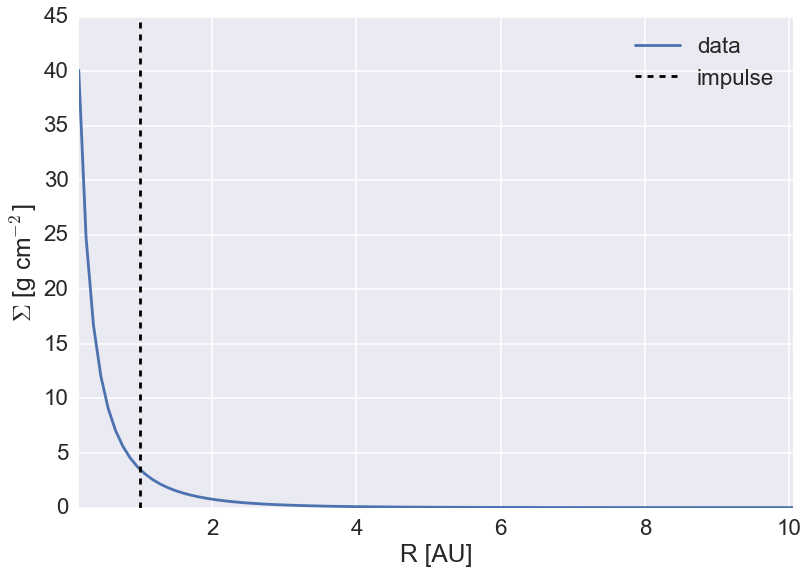

In [3]:
v = interact(plotter, k=widgets.IntSlider(min=0,max=len(checkpoint_filenames)-1))

def animation():
    slider = v.widget.children[0]
    for i in range(slider.min, slider.max+1):
        slider.value=i
        time.sleep(.1)
        
w = interact_manual(animation)
animation()

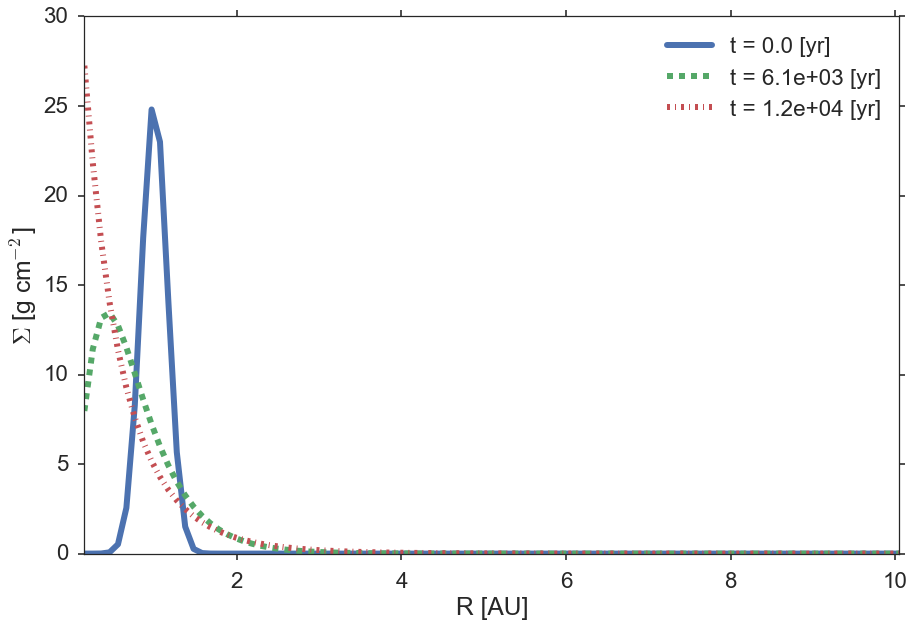

In [4]:
ks = [0,5,10]
linestyles = itertools.cycle(["-", "--", "-."])
with sns.axes_style("ticks"):
    for k in ks:
        (df.loc[k]["Sigma"]).plot(label="t = {0:0.2} [yr]".format(times[k]/yr),
                                 linestyle=next(linestyles),
                                 linewidth=6)
    plt.xlabel("R [AU]")
    plt.ylabel(r"$\Sigma$ [g cm$^{-2}$]")
    #     plt.xscale("log")
    #     plt.yscale("log")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig("disk_evolution.eps")

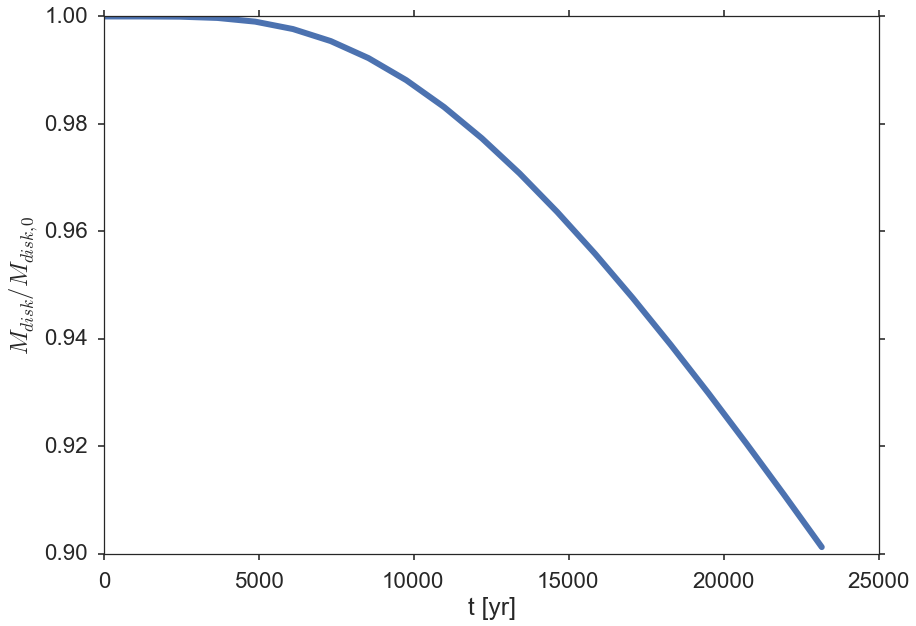

In [5]:
# plt.plot(times/yr, masses / masses[0])

ks = [0,5,10]
with sns.axes_style("ticks"):
    plt.plot(times/yr, masses / masses[0], linewidth=6)

    plt.xlabel("t [yr]")
    plt.ylabel(r"$M_{disk} / M_{disk,0}$")
    #     plt.xscale("log")
    #     plt.yscale("log")
#     plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig("disk_mass.eps")